In [12]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-38d192adb1b6>", line 3, in <module>
    get_ipython().magic("cd 'drive/My Drive/Thesis'")
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

Dur

OSError: ignored

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
import time
np.random.seed(5)

In [4]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [5]:
def rejection_sampling(pi1, pi2):

  # def f(x):
  #   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
  #           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


  # root = fsolve(f, [ini1,ini2])
    
  # pi1 = min(root)
  # pi2 = max(root)
  #using rejection sampling, get N random price samples
  N = 10000
  n = 0
  #A =(pi2/pi1-1)*(pi2-pi1)/don
  don = pi2*np.log(pi2/pi1) - (pi2-pi1)
  env =(pi2/pi1-1)/don
  rej_sample =[]
  while(n <= N):
    x = uniform.rvs(loc=pi1, scale=pi2-pi1)
    a = (pi2/x-1)/don/env
    u1 = uniform.rvs()
    if (u1 <= a):
      rej_sample.append(x)
      n += 1
  return rej_sample

In [6]:
# Experiment Randomisation first compute the log-lottery with uniform distribution:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []


APX_uniform_list = []
step =np.arange(0, 5, 0.05)
n = 100000

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   


def f(x):
  return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
  b = 20 - i
  a = 22 -b
  u = (a+b)/2
  sigma = np.sqrt((b-a)**2/12)
  
  bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
  r = sigma/u
  r_list.append(r)
  sigma_list.append(sigma)
  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  p_reserve = p_d*u/(2*p_d-1)

  opt = auction_exp(bid_uniform,b/2)
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(bid_uniform,p_reserve)

  DAPX_uniform.append((opt/exp_revenue)[0])  

  rexp_revenuer_list=[]
  k2 = u**2 + sigma**2
  pi1 = fsolve(f, [u])
  pi2 = 0.5*(k2/pi1 +pi1)
  print(pi1, pi2)
  rej_sample = []
  rej_sample = rejection_sampling(pi1,pi2)
  
  for rp_reserve in rej_sample:
    rexp_revenue = auction_exp(bid_uniform,rp_reserve)
    rexp_revenuer_list.append(rexp_revenue)
  
  APX_uniform_list.append((opt/np.average(rexp_revenuer_list))) 


toc = time.clock()
print('time: ' + str(toc-tic))


[4.64176938] [18.26308129]
[4.65497481] [18.19232442]
[4.66826474] [18.12194022]
[4.6816399] [18.05192793]
[4.69510106] [17.98228676]
[4.70864899] [17.91301592]
[4.72228446] [17.84411463]
[4.73600827] [17.77558211]
[4.7498212] [17.70741758]
[4.76372406] [17.63962026]
[4.77771767] [17.57218938]
[4.79180286] [17.50512415]
[4.80598046] [17.43842381]
[4.82025132] [17.37208757]
[4.8346163] [17.30611466]
[4.84907627] [17.24050431]
[4.8636321] [17.17525576]
[4.8782847] [17.11036822]
[4.89303495] [17.04584094]
[4.90788379] [16.98167315]
[4.92283212] [16.91786408]
[4.9378809] [16.85441296]
[4.95303108] [16.79131905]
[4.96828361] [16.72858157]
[4.98363949] [16.66619977]
[4.99909969] [16.60417289]
[5.01466522] [16.54250019]
[5.03033709] [16.4811809]
[5.04611635] [16.42021428]
[5.06200404] [16.35959957]
[5.07800121] [16.29933604]
[5.09410895] [16.23942293]
[5.11032833] [16.17985951]
[5.12666048] [16.12064504]
[5.1431065] [16.06177878]
[5.15966755] [16.00326]
[5.17634476] [15.94508796]
[5.19313932]

In [17]:
APX_uniform_list

[1.135442097997954,
 1.1308857373861192,
 1.1302149509276478,
 1.1275764072393164,
 1.1279750243440536,
 1.131782100398612,
 1.1267862899763041,
 1.1276097027730758,
 1.128495604509222,
 1.1233854890144424,
 1.121527366899086,
 1.1217139703098569,
 1.1136879012961474,
 1.118433502696725,
 1.115057685693389,
 1.1128254451284596,
 1.1129523510360122,
 1.1073030197044598,
 1.1105050398046212,
 1.1040533544205802,
 1.1080451523087351,
 1.1045461478549718,
 1.102884528936384,
 1.1026681219457029,
 1.1028994579279525,
 1.100669027078304,
 1.098496140883693,
 1.0972106289315549,
 1.093274510363395,
 1.0936778542725385,
 1.0957952233006665,
 1.0931903860214127,
 1.090177420211282,
 1.0901761537240702,
 1.0899204383768781,
 1.0852273080251733,
 1.0849988730274023,
 1.0835198050779276,
 1.0819623629802149,
 1.0834760269027275,
 1.0827584208381305,
 1.0784160150884916,
 1.0776278116023894,
 1.0784621784781356,
 1.0747590885231504,
 1.0735404781086384,
 1.0726784130333653,
 1.0721887885851462,
 1.

In [31]:
r_list=r_list[:69]
sigma_list = sigma_list[:69]
p_d_list = p_d_list[:69]
DAPX_uniform = DAPX_uniform[:69]
APX_uniform_list = APX_uniform_list[:69]

In [ ]:
import pandas as pd 
  
# creating the DataFrame 
my_df = { 'r' : r_list[:71],
          'DAPX_uniform': DAPX_uniform[:71],
         'APX_uniform_list': APX_uniform_list 
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('result_uniform.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 

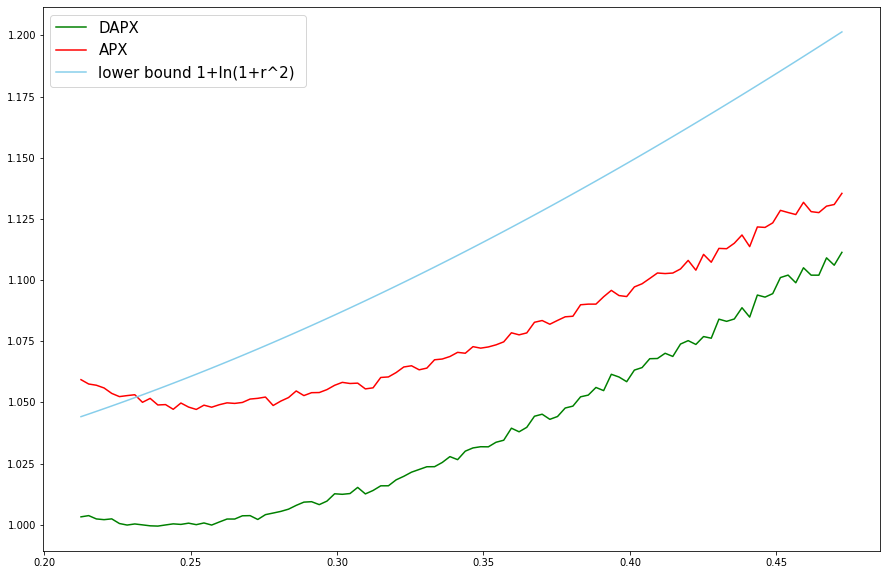

In [18]:
plt.figure(figsize=(15,10))
plt.plot(r_list, DAPX_uniform,color="green",label="DAPX")
plt.plot(r_list, APX_uniform_list,color="red",label="APX")
lower_bound = 1+np.log(1+np.power(r_list,2))
#plt.plot(r_list, ratio,color="blue",label="worst case rho_d")
plt.plot(r_list, lower_bound,color="skyblue",label="lower bound 1+ln(1+r^2) ")
plt.legend(loc="upper left",fontsize = 15)
plt.show()

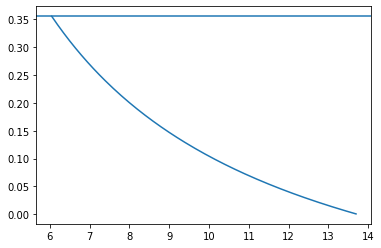

In [ ]:
# Experiment Randomisation first compute the log-lottery:

a = 6
b = 16
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)


def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [a,b])

pi1 = min(root)
pi2 = max(root)

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline((pi2/pi1-1)/don)
plt.plot(x,y)
plt.show()

In [ ]:
r = sigma/u
def solve_rho(x):
   return (1/(x**2))*(2*np.exp(x-1)-1)-1-r**2

upper = fsolve(solve_rho, 2)

lower = 1 + np.log(1+r**2)

print("when r = " + str(r) + ", our upper bound for APX = " + str(upper)+ " and  our lower bound = " + str(lower))          

In [ ]:
root

array([0.1, 1.2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(array([227., 136., 104.,  84.,  75.,  46.,  37.,  34.,  25.,  34.,  23.,
         32.,  15.,  17.,  14.,  13.,  12.,  12.,  13.,   7.,   5.,   7.,
          3.,   4.,   5.,   6.,   3.,   3.,   4.,   1.]),
 array([ 0.61204896,  1.05953022,  1.50701147,  1.95449273,  2.40197398,
         2.84945523,  3.29693649,  3.74441774,  4.191899  ,  4.63938025,
         5.0868615 ,  5.53434276,  5.98182401,  6.42930526,  6.87678652,
         7.32426777,  7.77174903,  8.21923028,  8.66671153,  9.11419279,
         9.56167404, 10.0091553 , 10.45663655, 10.9041178 , 11.35159906,
        11.79908031, 12.24656157, 12.69404282, 13.14152407, 13.58900533,
        14.03648658]),
 <a list of 30 Patch objects>)

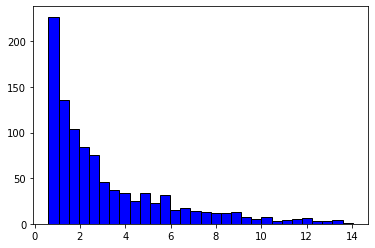

In [ ]:
#using rejection sampling, get N random price samples


def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]
N = 5000
n = 0
#A =(pi2/pi1-1)*(pi2-pi1)/don
u = 1
sigma = 5

root = fsolve(F, [0.1,1.2])

pi1 = min(root)
pi2 = max(root)

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
env =(pi2/pi1-1)/don
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/env
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1
rej_sample = rejection_sampling(u, sigma, a, b)
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
n = 10000
APX_list=[]
opt_list = []
exp_revenue_list = []
bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
opt = auction_exp(bid_uniform,b/2)
for p_reserve in rej_sample:
  exp_revenue = auction_exp(bid_uniform,p_reserve)
  exp_revenue_list.append(exp_revenue)


print('Uniform distribution APX = ' + str(opt/np.average(exp_revenue_list)))

#print("Theoritical APX_normal:")
#print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

Uniform distribution APX = 1.050505146212956


In [ ]:
# Experiment 1:
# random numbers from uniform distribution
# Generate 10000 numbers from 0 to 1 (run actuion 10000 times)
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])

# np.isclose(F(x), [ 0.0])


data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = auction_exp(data_uniform,b/2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

worst case robust DAPX = [2.19325701]
Uniform distribution DAPX = [1.056501]
Theoritically the DAPX_uniform:
[1.05224581]


In [ ]:
r = sigma/u
r

0.38490017945975047

In [ ]:
sum(opt_list)/sum(exp_revenue_list)
np.average(opt_list)/np.average(exp_revenue_list)

1.0885149953379003

In [ ]:
sigma

1.0

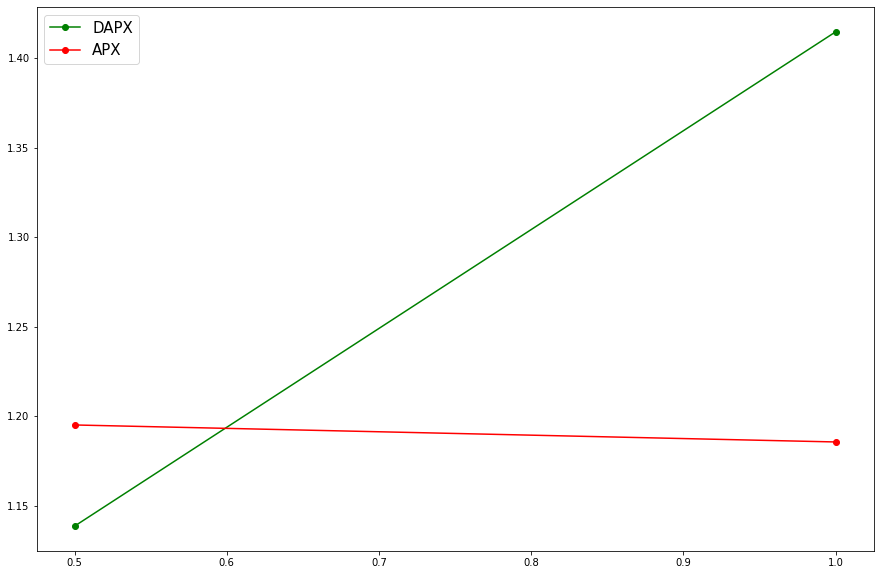

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(r_list, DAPX_norm_list,color="green",marker="o",label="DAPX")
plt.plot(r_list, APX_norm_list,color="red",marker="o",label="APX")
plt.legend(loc="upper left",fontsize = 15)
plt.show()

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 3
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

array([1.49414051, 4.09347574])

In [ ]:
np.isclose(F(x), [1.49414051, 4.09347574])
x= [1.49414051, 4.09347574]
x[0] * (1 + np.log(x[1]/x[0])) - u
x[0] *(2*x[1]-x[0]) - u**2 - sigma**2

-3.950606952685121e-09

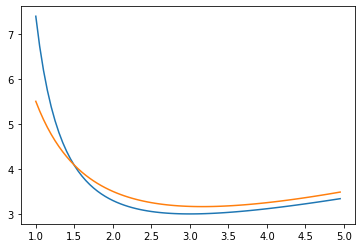

In [ ]:
x = np.arange(1, 5, 0.05)
u = 3
y = np.exp(u/x-1)*x
y1 = ((u**2 + sigma**2)/x +x)*0.5
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

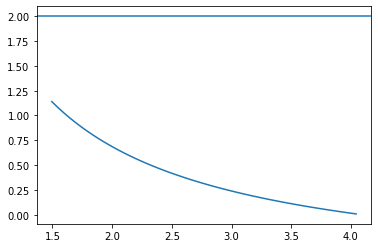

In [ ]:
pi2 = root[1]
pi1 = root[0]

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline(np.ceil((pi2/pi1-1)/don))
plt.plot(x,y)
plt.show()

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1

plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

(array([7103., 7252., 7191., 7236., 7067., 6743., 6113., 5650., 4983.,
        4666., 4268., 3910., 3548., 3320., 2906., 2690., 2331., 2108.,
        1928., 1648., 1518., 1270., 1124.,  941.,  768.,  648.,  463.,
         337.,  197.,   74.]),
 array([1.00003932, 1.0666106 , 1.13318188, 1.19975316, 1.26632444,
        1.33289573, 1.39946701, 1.46603829, 1.53260957, 1.59918085,
        1.66575213, 1.73232342, 1.7988947 , 1.86546598, 1.93203726,
        1.99860854, 2.06517982, 2.13175111, 2.19832239, 2.26489367,
        2.33146495, 2.39803623, 2.46460751, 2.5311788 , 2.59775008,
        2.66432136, 2.73089264, 2.79746392, 2.8640352 , 2.93060649,
        2.99717777]),
 <a list of 30 Patch objects>)

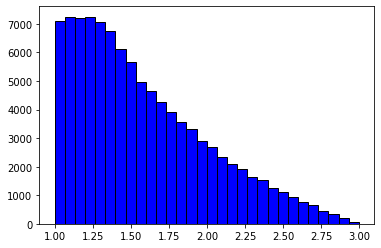

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
1np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))


worst case robust APX upper bound = 1.1053605156578263
Uniform distribution APX = 1.4096148418873307
